In [14]:
import swan_vis as swan
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
sg = swan.read('../swan.p')

Read in graph from ../swan.p


In [7]:
# # run die tests between each set of pgp1 things
# pgp1_conds = sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
# tested = []
# for c1 in pgp1_conds:
#     for c2 in pgp1_conds: 
#         test1 = (c1, c2)
#         test2 = (c2, c1)
#         if test1 in tested or test2 in tested:
#             continue
#         elif c1 == c2:
#             continue
#         else:
#             print()
#             print(c1)
#             print(c2)
#             tested.append(test1)
#             tested.append(test2)
#             fname = 'iso_die_{}_{}.tsv'.format(c1, c2)
#             die_table, test_results = sg.die_gene_test(kind='iso',
#                                                        obs_col='sample',
#                                                        obs_conditions=[c1, c2],
#                                                        verbose=True)
#             die_table.to_csv(fname, sep='\t')
            
        

In [9]:
tested = []

conds = sg.adata.obs.loc[sg.adata.obs['sample'].str.contains('pgp1'), 'sample'].unique().tolist()
data = [[0 for i in range(len(conds))] for j in range(len(conds))]
n_die = pd.DataFrame(data=data, columns=conds, index=conds)
n_die.head()

for c1 in conds:
    for c2 in conds:
        if c1 == c2:
            continue 
        fname = 'iso_die_{}_{}.tsv'.format(c1, c2)
        try:
            df = pd.read_csv(fname, sep='\t')
        except:
            fname = 'iso_die_{}_{}.tsv'.format(c2, c1)
            df = pd.read_csv(fname, sep='\t')
        
        # filter 
        df = df.loc[(df.adj_p_val < 0.05)&(df.dpi > 10)]
        
        n_die.loc[c1, c2] = len(df.index)

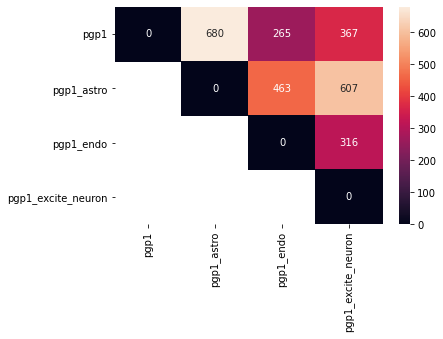

In [15]:
# Getting the Upper Triangle of the co-relation matrix
matrix = np.tril(n_die)

# using the upper triangle matrix as mask 
sns.heatmap(n_die, annot=True, mask=matrix, fmt='')